# Decoding distraction LPP runs vs non distraction ones

## Getting the data, Epoching 

In [2]:
from pathlib import Path

path = Path('/home/co/data/meg_distraction/240620/')

instructions = path / 'sub-3_instructions.tsv'
# Open it with pandas
import pandas as pd
instructions = pd.read_csv(instructions, sep='\t')


## Cropping 3 runs

Run 2 and even: no tasks: let's try to decode from it

In [2]:
# It is possible to open the run1_2_3.fif file, and crop only the middle part, based on the triggers

# First, extract the triggers from this file
import mne

raw = mne.io.read_raw_fif(path / 'run1_2_3.fif', preload=True, allow_maxshield=True)
events = mne.find_events(raw)


Opening raw data file /home/co/data/meg_distraction/240620/run1_2_3.fif...
    Read a total of 13 projection items:
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
    Range : 166000 ... 1019999 =    166.000 ...  1019.999 secs
Ready.


<ipython-input-2-93e0913675e9>:6: RuntimeWarning: This filename (/home/co/data/meg_distraction/240620/run1_2_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path / 'run1_2_3.fif', preload=True, allow_maxshield=True)
<ipython-input-2-93e0913675e9>:6: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne.io.read_raw_fif(path / 'run1_2_3.fif', preload=True, allow_maxshield=True)


Reading 0 ... 853999  =      0.000 ...   853.999 secs...
3641 events found
Event IDs: [128]


No sound triggers: we don't know exactly when the runs start and stop: we only have the word onset information.

We'll have to guess using the word onset triggers when there is an inter run pause.

In [3]:
# We need to crop the raw file into 3 sub-runs. The way to do that is by computing the time difference between the triggers, and if it's larger than for eg.
# 20 seconds, we can assume that it's a new run. We can then crop the raw file into 3 parts, and save them as separate files.

thresh_old = 30

# We can compute the time difference between the triggers
time_diff = events[1:, 0] - events[:-1, 0]
time_diff = time_diff / raw.info['sfreq'] # Convert to seconds

# We can then find the indices where the time difference is larger than the threshold
run_indices = [0] + list((time_diff > thresh_old).nonzero()[0] + 1) + [len(events)-1]
run_indices

[0, 938, 2367, 3640]

In [54]:

# We can then loop over the run_indices, and crop the raw file into 3 parts
for i, (start, end) in enumerate(zip(run_indices[:-1], run_indices[1:])):
    raw_part = raw.copy().crop(tmin=(events[start, 0] - raw.first_samp - 1000)/ raw.info['sfreq'], tmax=(((events[end, 0] -raw.first_samp) / raw.info['sfreq']) + 1))  # Add 1 second at the end
    raw_part.save(path / f'run_{i+1}.fif', overwrite=True)

Overwriting existing file.
Writing /home/co/data/meg_distraction/240620/run_1.fif


<ipython-input-54-3dfb706917a3>:4: RuntimeWarning: This filename (/home/co/data/meg_distraction/240620/run_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_part.save(path / f'run_{i+1}.fif', overwrite=True)


Closing /home/co/data/meg_distraction/240620/run_1.fif
[done]
Overwriting existing file.
Writing /home/co/data/meg_distraction/240620/run_2.fif


<ipython-input-54-3dfb706917a3>:4: RuntimeWarning: This filename (/home/co/data/meg_distraction/240620/run_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_part.save(path / f'run_{i+1}.fif', overwrite=True)


Closing /home/co/data/meg_distraction/240620/run_2.fif
[done]
Overwriting existing file.
Writing /home/co/data/meg_distraction/240620/run_3.fif


<ipython-input-54-3dfb706917a3>:4: RuntimeWarning: This filename (/home/co/data/meg_distraction/240620/run_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_part.save(path / f'run_{i+1}.fif', overwrite=True)


Closing /home/co/data/meg_distraction/240620/run_3.fif
[done]


## Opening the resulting file

In [3]:
# Open the raw file again, run1
import mne
raw1 = mne.io.read_raw_fif(path / 'run_2.fif', preload=True, allow_maxshield=True)  
import matplotlib.pyplot as plt
events1 = mne.find_events(raw1)

# Take one out of two since they are duplicated
events1 = events1[::2]
import numpy as np 
event_file = path / 'run2_distraction.csv'
meta = pd.read_csv(event_file, sep="\t")
meta["word"] = meta["trial_type"].apply(
    lambda x: eval(x)["word"] if type(eval(x)) == dict else np.nan
)


Opening raw data file /home/co/data/meg_distraction/240620/run_2.fif...
    Read a total of 13 projection items:
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle


    Range : 405492 ... 749577 =    405.492 ...   749.577 secs
Ready.


/tmp/ipykernel_99255/4263984186.py:3: RuntimeWarning: This filename (/home/co/data/meg_distraction/240620/run_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw1 = mne.io.read_raw_fif(path / 'run_2.fif', preload=True, allow_maxshield=True)
/tmp/ipykernel_99255/4263984186.py:3: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw1 = mne.io.read_raw_fif(path / 'run_2.fif', preload=True, allow_maxshield=True)


Reading 0 ... 344085  =      0.000 ...   344.085 secs...
1437 events found on stim channel STI101
Event IDs: [128]


IndexError: index 719 is out of bounds for axis 0 with size 719

In [9]:


from utils_distraction import match_list, approx_match_samples
word_events = events1[events1[:, 2] > 1]
meg_delta = np.diff(word_events[:, 0].astype(float) / raw1.info["sfreq"])
meta_delta = np.diff(meta.onset.values)
pres = 1e2
# i, j = match_list(np.round(meg_delta*pres), np.round(meta_delta*pres))
# assert len(i) / len(meg_delta) > .70

i, j = approx_match_samples(
    word_events[:, 0],
    (meta.onset * 1000).tolist(),
    abs_tol=30,
    max_missing=5,
)
assert len(i) / len(meg_delta) > .90


meta["has_trigger"] = False
meta.loc[j, "has_trigger"] = True

# integrate events to meta for simplicity
meta.loc[j, "start"] = events1[i, 0] / raw1.info["sfreq"]
# preproc raw
raw1.load_data()
raw1 = raw1.filter(0.5, 20)
from utils_distraction import mne_events
epochs = mne.Epochs(
    raw1,
    **mne_events(meta, raw1, start="onset", level="XXX"),
    decim=100,
    tmin=0.,
    tmax=1.,
    preload=False,
    baseline=None,
    verbose=True,
    proj=False,
    event_repeated='drop',
)


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 8 columns
716 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 13)


/home/co/miniconda3/envs/nrst/lib/python3.10/site-packages/pandas/core/series.py:1022: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
/tmp/ipykernel_99255/984287560.py:27: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(
/tmp/ipykernel_99255/984287560.py:27: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(


In [10]:
len(i)

715

In [23]:
mne_events(meta, raw1, start="onset", level="XXX")['events']

/home/co/miniconda3/envs/nrst/lib/python3.10/site-packages/pandas/core/series.py:1022: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


array([[              406492,                    1,                    1],
       [              406663,                    1,                    1],
       [              406833,                    1,                    1],
       ...,
       [-9223372036854775808,                    1,                    1],
       [              673222,                    1,                    1],
       [-9223372036854775808,                    1,                    1]])

## Decoding

In [11]:
import spacy
from utils import decod_xy
print("Word embeddings decoding")
nlp = spacy.load("fr_core_news_sm")

epochs = epochs.load_data().pick_types(meg=True, stim=False, misc=False)
X = epochs.get_data()

embeddings = epochs.metadata.word.apply(lambda word: nlp(word).vector).values
embeddings = np.array([emb for emb in embeddings])
R_vec = decod_xy(X, embeddings)
scores = np.mean(R_vec, axis=1)

Word embeddings decoding
...........

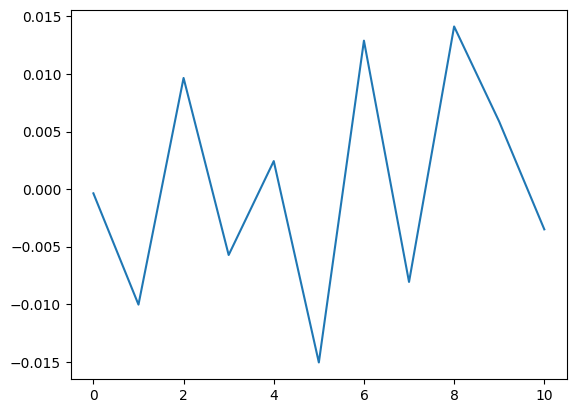

In [12]:
plt.plot(scores)

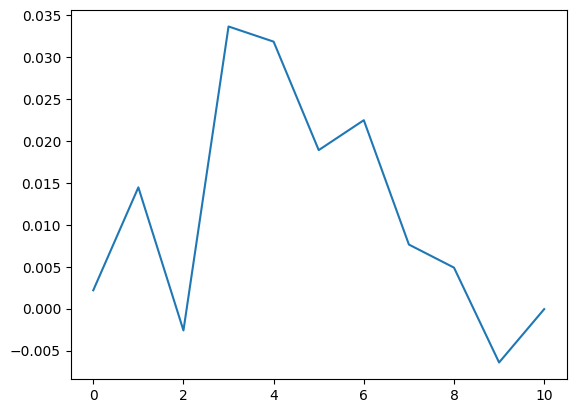

In [12]:
plt.plot(scores)

In [16]:
from utils_distraction import match_list
import numpy as np 
import mne
import matplotlib.pyplot as plt
from utils_distraction import mne_events

import spacy
from utils import decod_xy


def score_subj(run: int):
    # Open the raw file again, run1
    raw1 = mne.io.read_raw_fif(path / f'run_{run}.fif', preload=True, allow_maxshield=True)  
    events1 = mne.find_events(raw1)
    # Take one out of two since they are duplicated
    events1 = events1[::2]
    event_file = path / f'run{run}_distraction.csv'
    meta = pd.read_csv(event_file, sep="\t")
    meta["word"] = meta["trial_type"].apply(
        lambda x: eval(x)["word"] if type(eval(x)) == dict else np.nan
    )

    word_events = events1[events1[:, 2] > 1]
    meg_delta = np.diff(word_events[:, 0].astype(float) / raw1.info["sfreq"])
    meta_delta = np.diff(meta.onset.values)
    pres = 1e2
    # i, j = match_list(np.round(meg_delta*pres), np.round(meta_delta*pres))


    i, j = approx_match_samples(
        word_events[:, 0],
        (meta.onset * 1000).tolist(),
        abs_tol=30,
        max_missing=5,
    )
    assert len(i) / len(meg_delta) > .70

    meta["has_trigger"] = False
    meta.loc[j, "has_trigger"] = True

    # integrate events to meta for simplicity
    meta.loc[j, "start"] = events1[i, 0] / raw1.info["sfreq"]
    # preproc raw
    raw1.load_data()
    raw1 = raw1.filter(0.5, 20)
    epochs = mne.Epochs(
        raw1,
        **mne_events(meta, raw1, start="onset", level="XXX"),
        decim=100,
        tmin=-1.,
        tmax=1.,
        preload=False,
        baseline=None,
        verbose=True,
        proj=False,
        event_repeated='drop',
    )
    nlp = spacy.load("fr_core_news_sm")

    epochs = epochs.load_data().pick_types(meg=True, stim=False, misc=False)
    X = epochs.get_data()

    embeddings = epochs.metadata.word.apply(lambda word: nlp(word).vector).values
    embeddings = np.array([emb for emb in embeddings])
    R_vec = decod_xy(X, embeddings)
    scores = np.mean(R_vec, axis=1)
    return scores

In [17]:
scores = score_subj(1)

Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 8 columns
470 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 13)


/home/co/miniconda3/envs/nrst/lib/python3.10/site-packages/pandas/core/series.py:1022: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
/tmp/ipykernel_99255/2614526289.py:46: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(
/tmp/ipykernel_99255/2614526289.py:46: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(


.....................

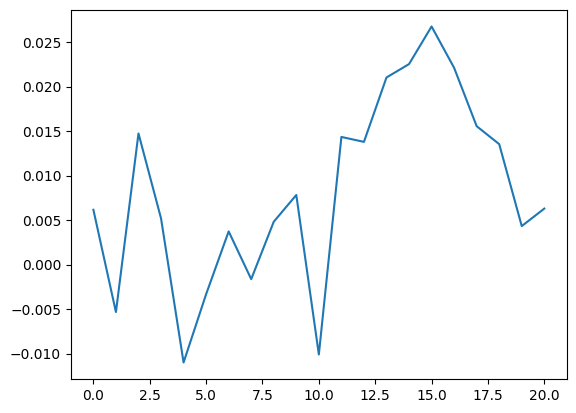

In [18]:
plt.plot(scores)